<a href="https://colab.research.google.com/github/soyab266/test/blob/master/AREA_PLOT_BY_MATPLOTLIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import piplite
await piplite.install(['openpyxl==3.0.9'])
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__)

from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

df = pd.read_excel(
    text,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
df.shape

(195, 43)

In [ ]:
df['Total']=df.sum(axis=1)

<ipython-input-23-7ecbd0406154>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total']=df.sum(axis=1)


In [ ]:
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,18433


In [ ]:
df.rename(columns={'OdName' :'country', 'AreaName' : 'area', 'RegName': 'region' }, inplace=True)


In [ ]:
df.head()

,Type,Coverage,country,AREA,area,REG,region,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,18433
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,2774
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,1,1,0,0,0,0,1,1,2749


In [ ]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [ ]:
df.head()

,country,area,region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,18433
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2774
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,2749


In [ ]:
df.columns=list(map(str,df.columns))

In [ ]:
df.columns

Index(['country', 'area', 'region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  195 non-null    object
 1   area     195 non-null    object
 2   region   195 non-null    object
 3   DevName  195 non-null    object
 4   1980     195 non-null    int64 
 5   1981     195 non-null    int64 
 6   1982     195 non-null    int64 
 7   1983     195 non-null    int64 
 8   1984     195 non-null    int64 
 9   1985     195 non-null    int64 
 10  1986     195 non-null    int64 
 11  1987     195 non-null    int64 
 12  1988     195 non-null    int64 
 13  1989     195 non-null    int64 
 14  1990     195 non-null    int64 
 15  1991     195 non-null    int64 
 16  1992     195 non-null    int64 
 17  1993     195 non-null    int64 
 18  1994     195 non-null    int64 
 19  1995     195 non-null    int64 
 20  1996     195 non-null    int64 
 21  1997     195 non-null    int64 
 22  19

In [ ]:
years=list(map(str, range(1980,2014)))

In [ ]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [ ]:
df.sort_values(['Total'], ascending = False, inplace=True)

In [ ]:
top5=df.head()

In [ ]:
top5 = top5[years].transpose()

top5.head()

,79,36,183,136,130
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


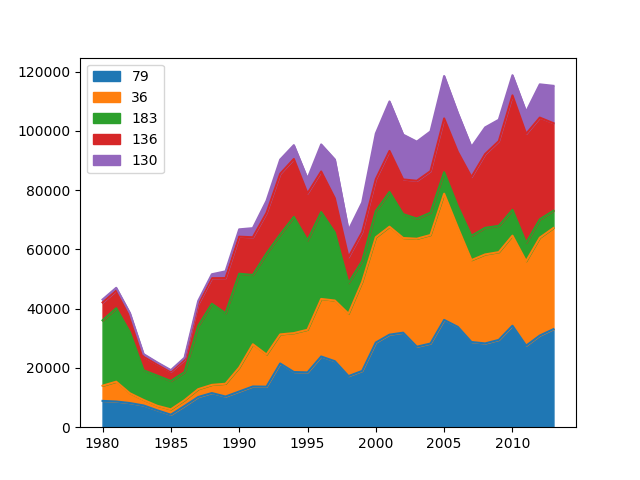

In [ ]:
top5.plot(kind='area',stacked=False)
plt.show()

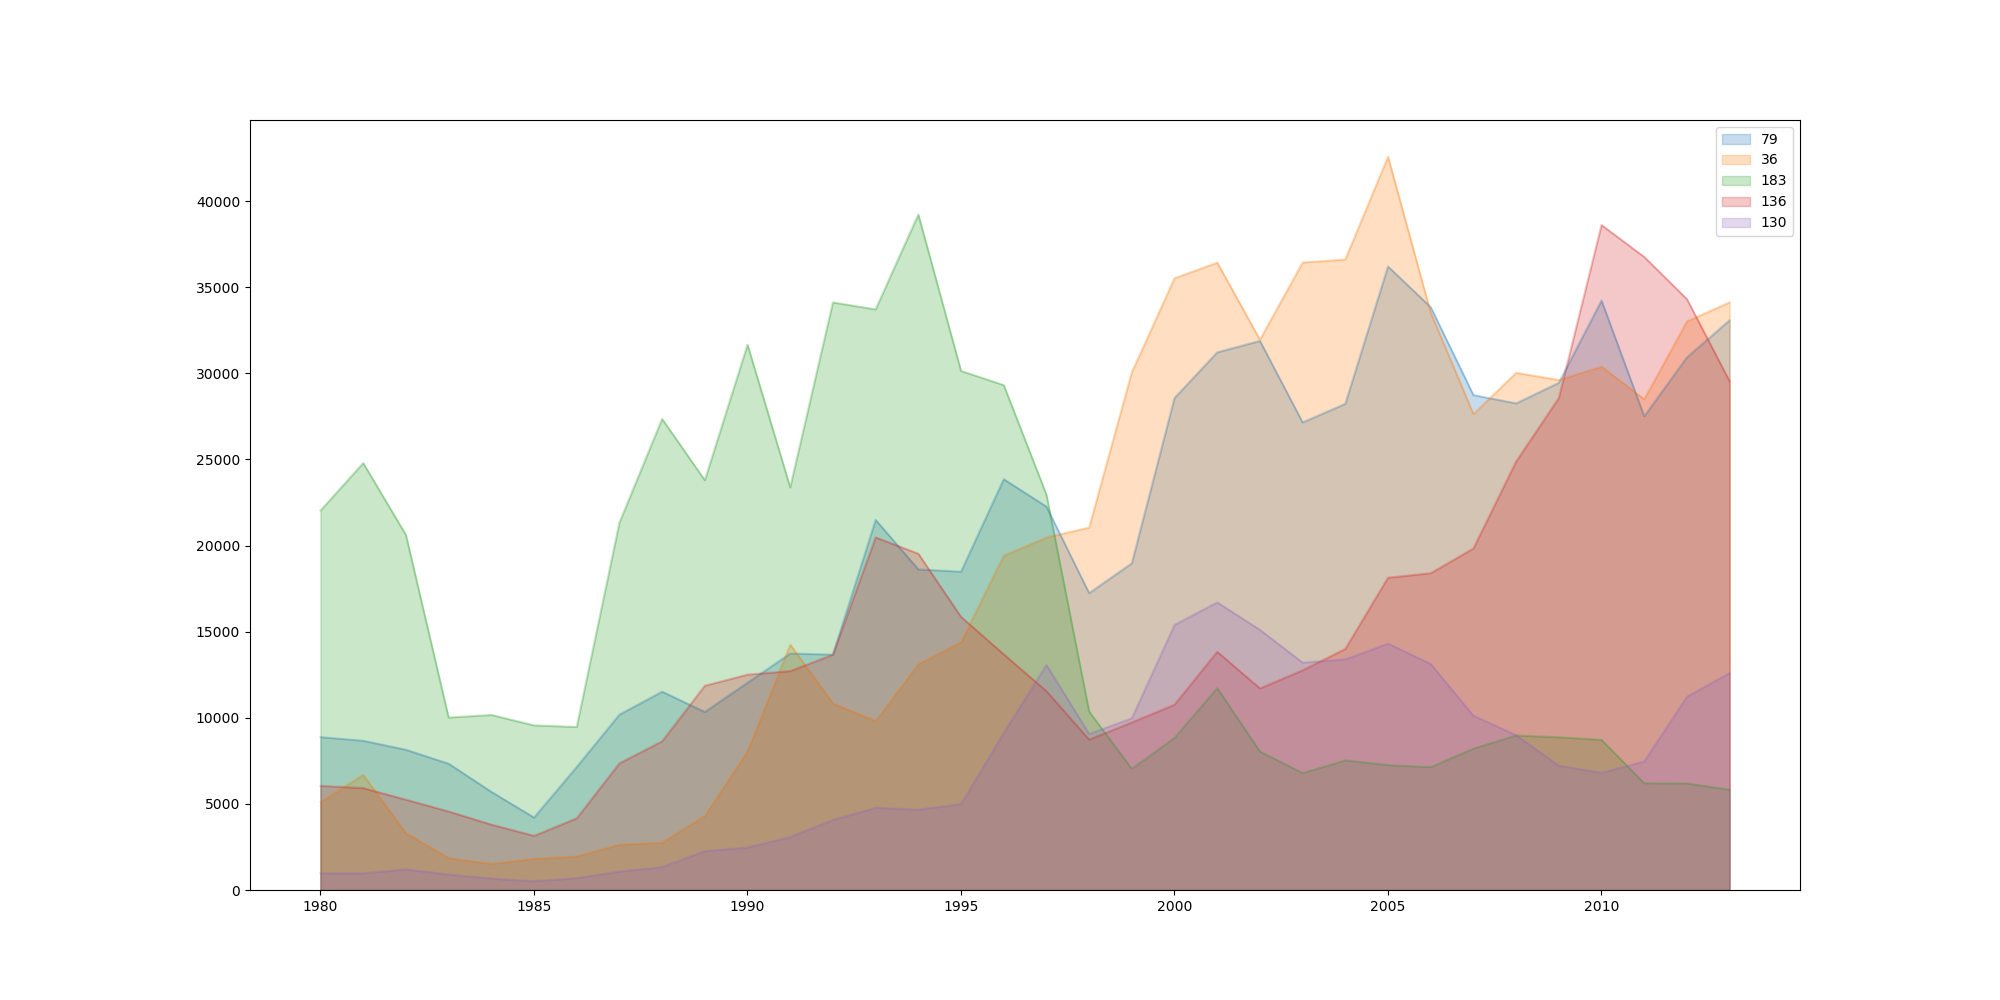

In [ ]:
top5.plot(kind='area',stacked=False, alpha=0.25,figsize=(20,10))
plt.show()

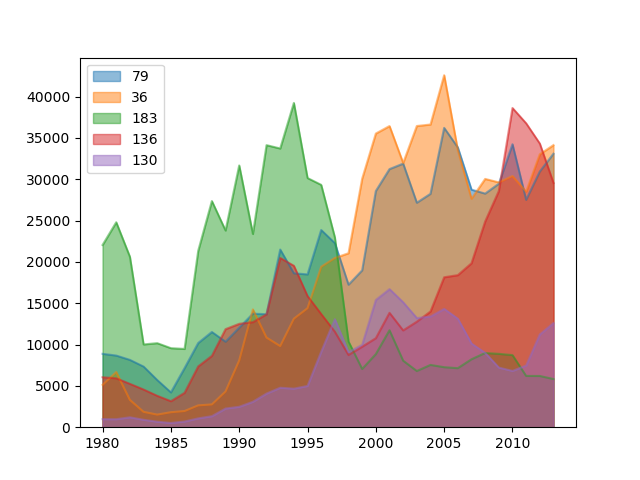

In [ ]:
top5.plot(kind='area',stacked=False)
plt.show()

In [ ]:
ax=top5.plot(kind='area',stacked=False,alpha=0.35,figsize=(20,10) )
ax.set_title('immigration ')
ax.set_ylabel('num of immigrants')
ax.set_xlabel('years')



Text(0.5, 0, 'years')

Text(0.5, 0, 'years')

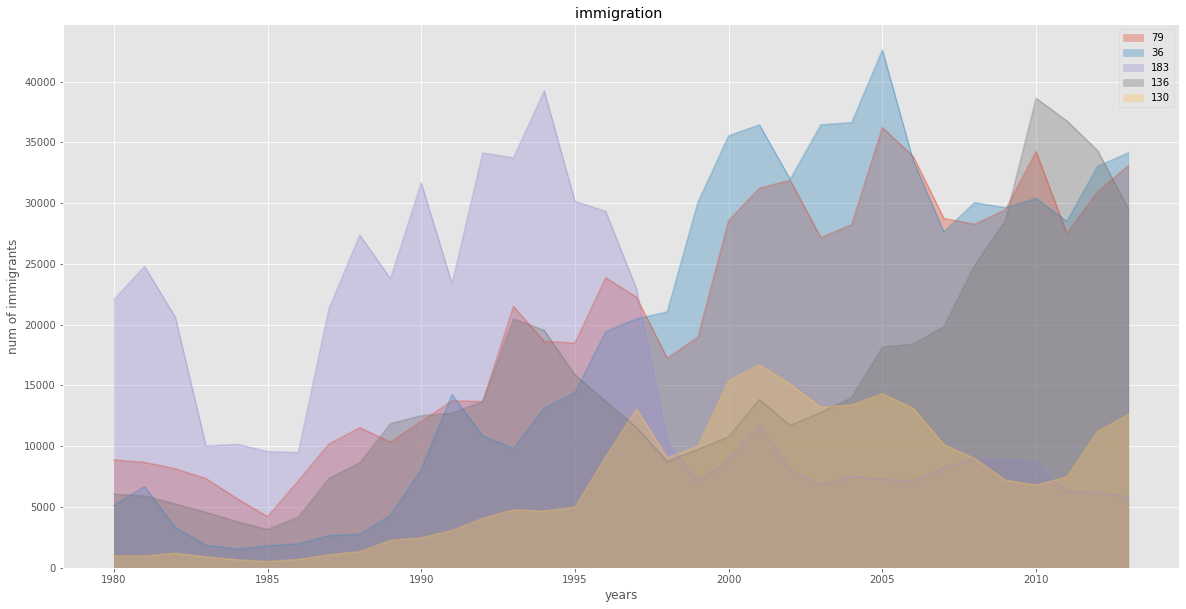

In [ ]:
ax=top5.plot(kind='area',stacked=False,alpha=0.35,figsize=(20,10) )
ax.set_title('immigration ')
ax.set_ylabel('num of immigrants')
ax.set_xlabel('years')



In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure


Text(0.5, 0, 'years')

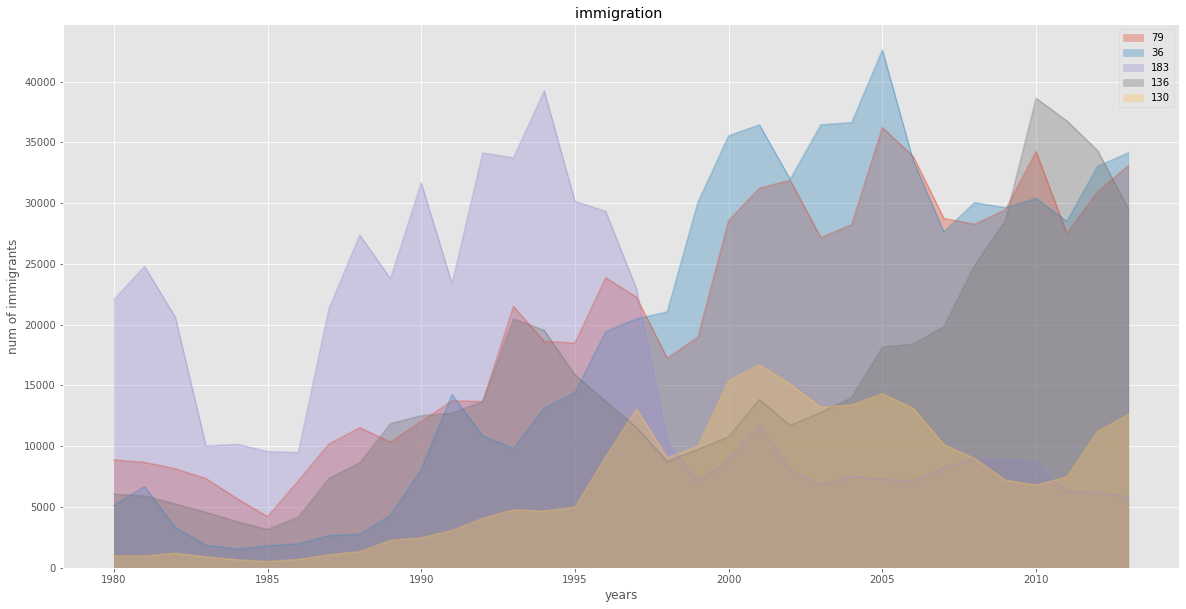

In [ ]:
ax=top5.plot(kind='area',stacked=False,alpha=0.35,figsize=(20,10) )
ax.set_title('immigration ')
ax.set_ylabel('num of immigrants')
ax.set_xlabel('years')


In [ ]:
df.head(2)

,country,area,region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,699242
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,662705


In [ ]:
df.sort_values(['Total'],ascending=False, inplace=True)

In [ ]:
df.tail(5)

,country,area,region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
123,New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,2744
149,San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2739
32,Canada,Northern America,Northern America,Developed regions,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,2731
150,Sao Tome and Principe,Africa,Middle Africa,Developing regions,0,0,0,0,0,0,...,1,1,0,0,1,2,0,0,1,2726
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2719


In [ ]:
years=list(map(str,range(1980,2014)))
least5=df.tail(5)


In [ ]:
least5.head()

,123,149,32,150,191
1980,0,1,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


In [ ]:
df_least5 = df.tail(5)
df_least5 = df_least5[years].transpose() 

    


,123,149,32,150,191
1980,0,1,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


In [ ]:
df_least5.head()

,123,149,32,150,191
1980,0,1,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


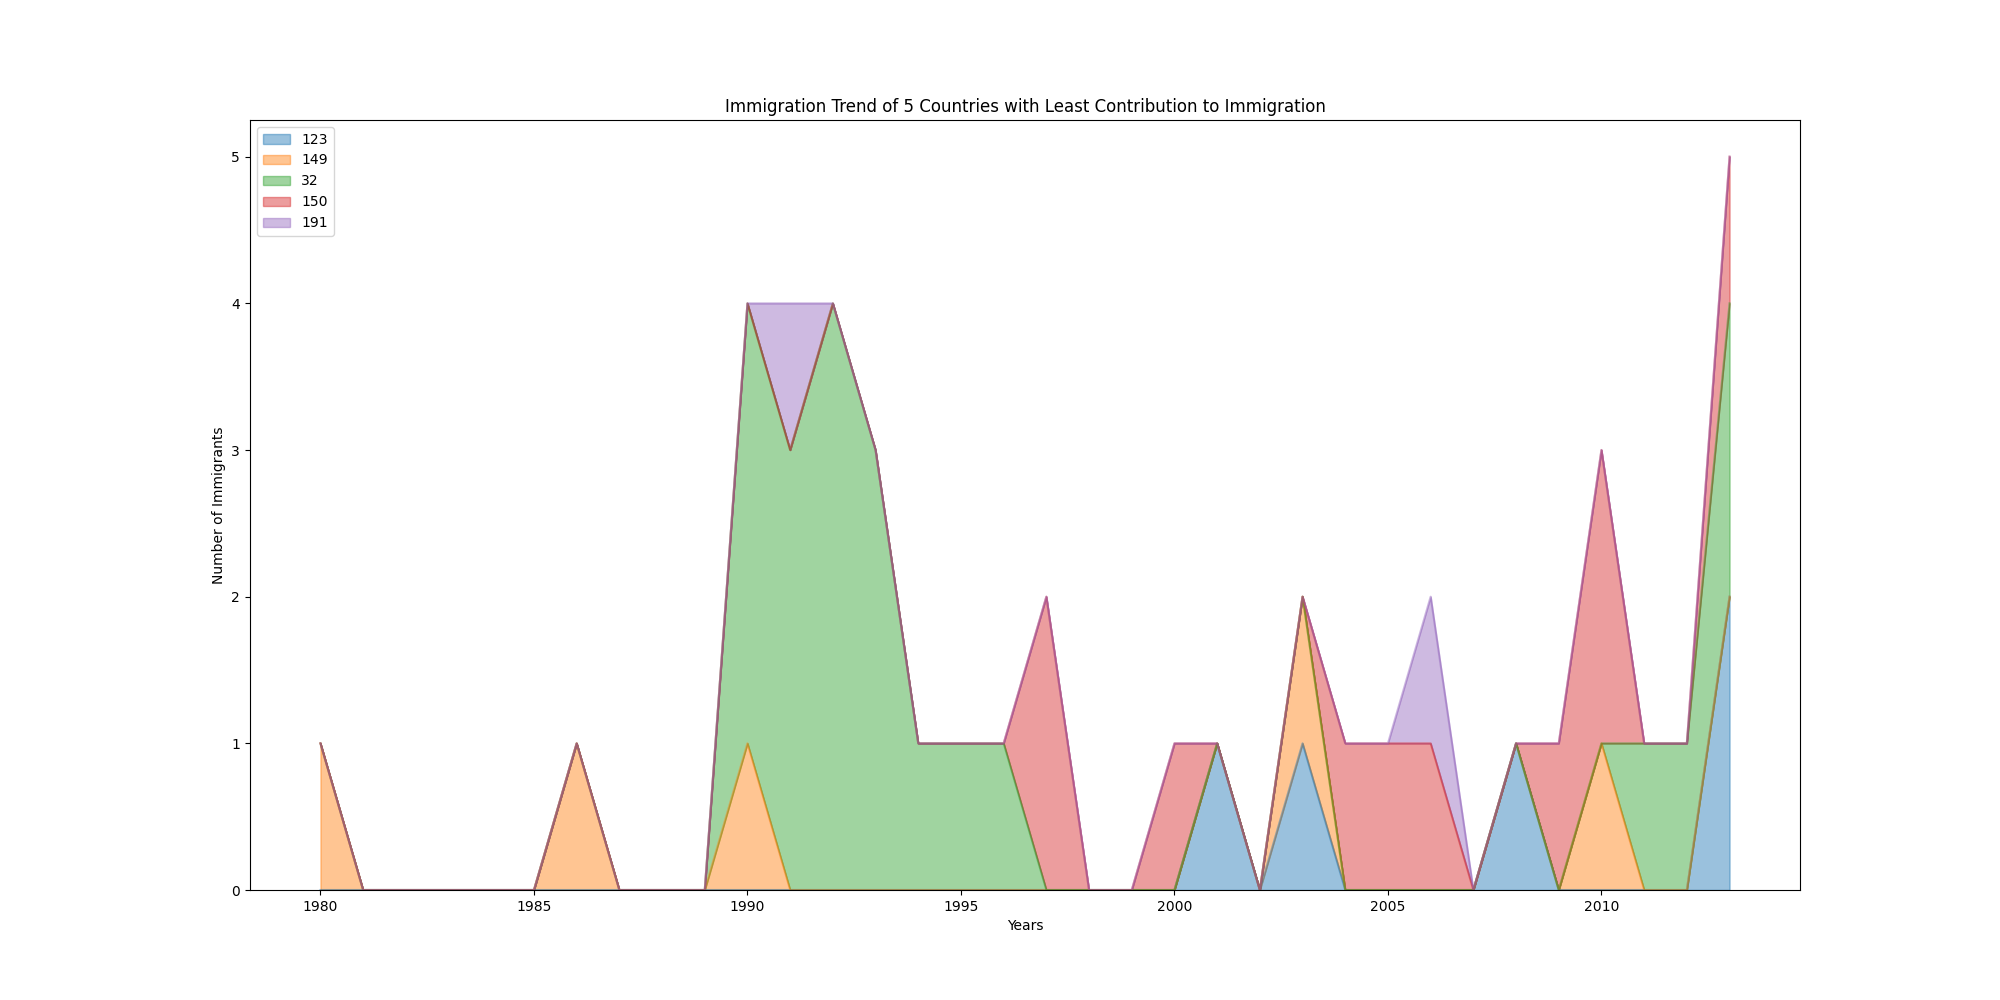

In [ ]:
least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

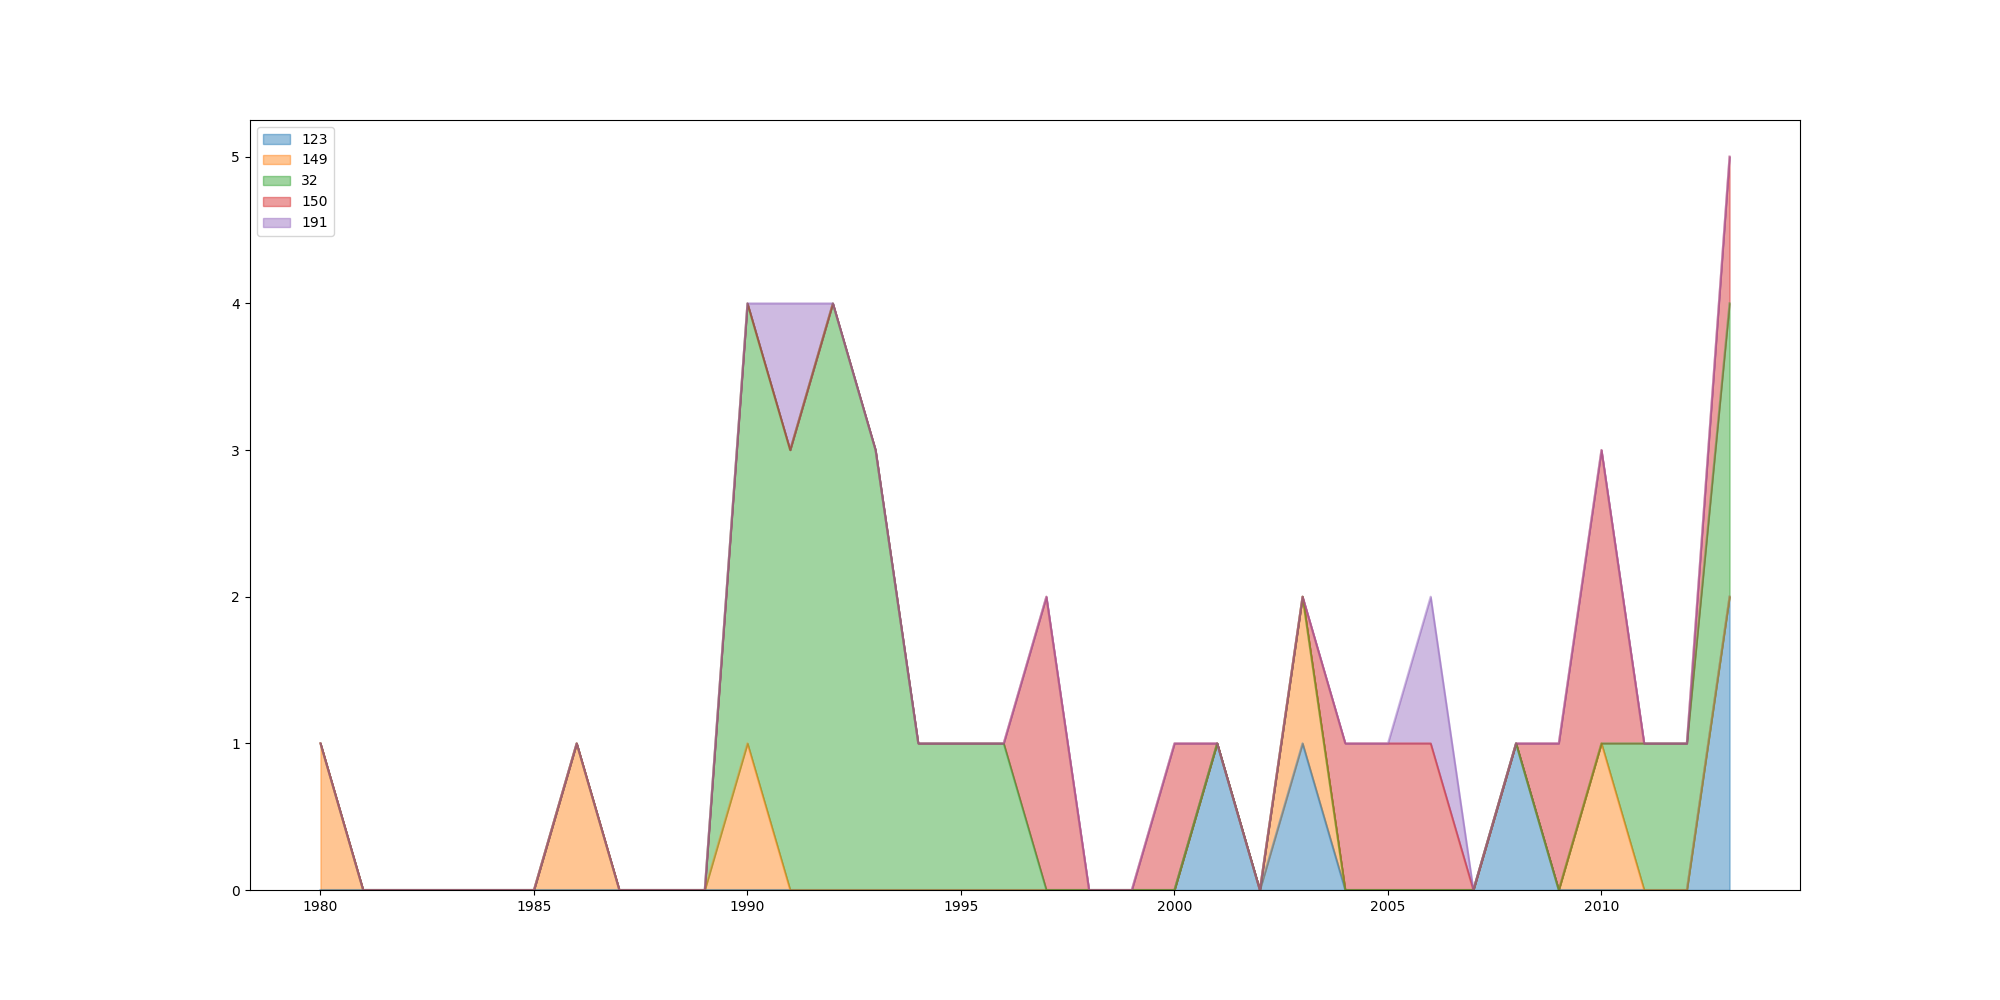

In [ ]:
 df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 
plt.show()

In [ ]:
least5=df.tail(5)

In [ ]:
years=list(map(str,range(1980,2014)))

In [ ]:
least5=least5[years].transpose()

In [ ]:
least5.head()

,123,149,32,150,191
1980,0,1,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


In [ ]:
least5.index = least5.index.map(int) 


Text(0, 0.5, 'num of immigration')

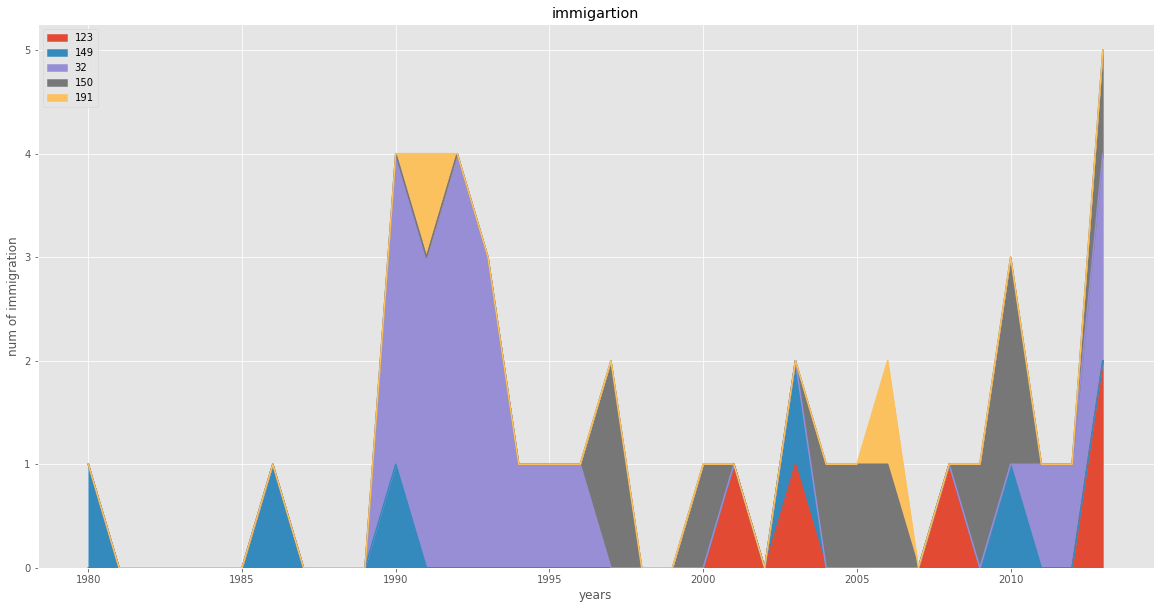

In [ ]:
ax=least5.plot(kind='area', figsize=(20,10))
ax.set_title('immigartion')
ax.set_xlabel('years')
ax.set_ylabel('num of immigration')